In [1]:
from __future__ import print_function
import os
import sys
import cv2
from matplotlib import pyplot as plt
import numpy as np

from local_config import CURRENT_DIR
sys.path.append(os.path.join(CURRENT_DIR, ".."))

try:
    from config import Config
    from data_loader import WaymoStixelDataset
except:
    print("failed to load module")
    
from albumentations import (
    Resize,
    Compose,
    CLAHE,
    HueSaturationValue,
    RandomBrightness,
    RandomContrast,
    RandomGamma,
    ToFloat,
    Normalize,
    GaussNoise,
    RandomShadow,
    RandomRain,
)

import utility
import importlib
from models.stixel_net import build_stixel_net, build_stixel_net_small

# TensorFlow
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import (
    ModelCheckpoint,
    ReduceLROnPlateau,
    EarlyStopping,
)

In [2]:
dt_config = Config()
dt_config.display()


Configurations:
CURRENT_DIR                    /pfs/data5/home/es/es_es/es_menzweil/StixelNet/obstacle_detection_stixelnet
DATA_PATH                      /pfs/data5/home/es/es_es/es_menzweil/StixelNet/obstacle_detection_stixelnet/data/StixelNet_Waymo
GROUND_TRUTH_PATH              /pfs/data5/home/es/es_es/es_menzweil/StixelNet/obstacle_detection_stixelnet/data/StixelNet_Waymo/waymo_train.txt
NUM_EPOCHS                     50
SAVED_MODELS_PATH              saved_models




In [3]:
## Val set

#val_aug = Compose([Normalize(p=1.0)])
val_set = WaymoStixelDataset(
        data_path=dt_config.DATA_PATH,
        ground_truth_path=os.path.join(dt_config.DATA_PATH, "waymo_val.txt"),
        transform=None,
    )


In [4]:
# StixelNet model

model = build_stixel_net()
modelPath = "/home/es/es_es/es_menzweil/StixelNet/obstacle_detection_stixelnet/notebooks/saved_models/"
modelFile = modelPath + "model-002-60547.8828.h5"
model.load_weights(modelFile)




2022-03-11 16:40:16.889681: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-11 16:40:22.336772: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30979 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:b2:00.0, compute capability: 7.0


2022-03-11 16:40:34.181514: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8202


[ 792.  736.  792.  784.  792.  792.  784.  784.  784.  792.  800.  816.
  792.  816.  800.  816.  804.  550.  784.  550.  816.  550.  808.  550.
  776.  550.  752.  550.  768.  550.  752.  550.  744.  764.  760.  550.
  760.  752.  752.  550.  752.  748.  752.  550.  752.  764.  550.  744.
  752.  760.  550.  736.  736.  752.  550.  760.  744.  752.  550.  736.
  744.  744.  744.  550.  728.  736.  736.  736.  736.  736.  744.  550.
  736.  728.  736.  732.  736.  736.  550.  736.  656.  656.  696.  736.
  664.  648.  550.  664.  640.  736.  736.  550.  736.  550.  550.  550.
  550.  550.  550.  550.  550.  550.  550.  550.  550.  550.  550.  550.
  550.  550.  550.  550.  550.  550.  550.  550.  550.  550.  550.  550.
  550.  550.  550.  550.  550.  550.  550.  550.  550.  550.  550.  550.
  550.  550.  550.  550.  550.  550.  550.  728.  550.  728.  550.  728.
  720.  736.  736.  736.  728.  736.  760.  760.  760.  752.  760.  752.
  784.  550.  784.  784.  784.  784.  784.  760.  7

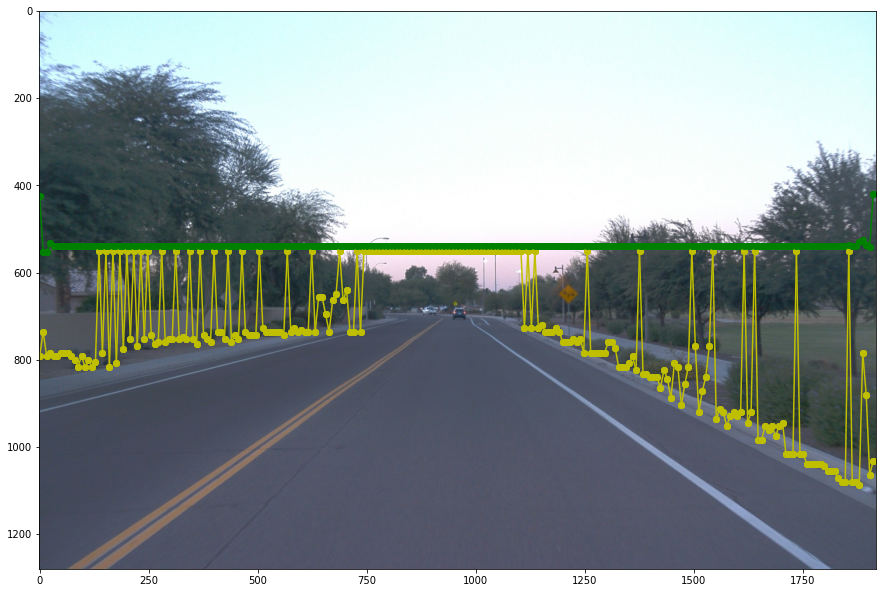

In [5]:
# Run predictions

idx = 150

imgs, labels = val_set[idx]

predictions = model.predict(np.expand_dims(imgs[0],axis=0))
predictions = predictions[0,:,0]

plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(imgs[0], cv2.COLOR_BGR2RGB))

origImageWidth = imgs[0].shape[1]
labelWidth = labels.size

x = list(range(0, origImageWidth, int(origImageWidth/labelWidth)))
print(labels)
print(predictions)
plt.plot(x, labels, 'yo')
plt.plot(x, predictions, 'go')
for i in range(0, len(x), 1):
    plt.plot(x[i:i+2], labels[i:i+2],      'y-o')
    plt.plot(x[i:i+2], predictions[i:i+2], 'g-o')